In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here we can see :1)Int:-PassengerId,Survived,Pclass,SibSb,Parch            

               2)Obejct:-Name,Sex,Ticket,Cabin,Embarked

           3)float:-Age,Fare

Here we can see that we have numberic and categorical value both present.So,we need to change it using LabelEncoding

In [4]:
df_train.shape

(891, 12)

Here we have 891 rows and 12 columns

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can see we can see:Age, Cabin, and Embarked are having missing values.And also the data type of the datasets is shown.And also memory usage :83.7+ KB

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see Age is having 177 missing values , Cabin=687,Embarked=2 missing values.We need to remove this missing values or else it will affect our datasets.        

<AxesSubplot:>

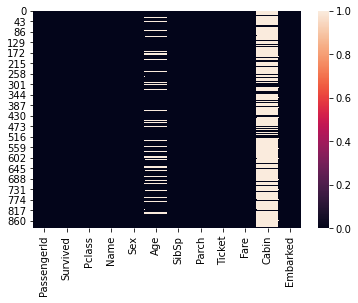

In [9]:
sns.heatmap(df_train.isnull())

Using heatmap we can also check null values

In [10]:
df_train['Survived'].unique()

array([0, 1], dtype=int64)

Here we can see we have only 2 unique values in the dataset. O --> Not Survived and 1 --> Survived

In [12]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

here we can see 549 people did not survived whereas 342 people survived the sink.
Hence our target variable is imbalance.we have to balance it

<AxesSubplot:xlabel='Survived', ylabel='count'>

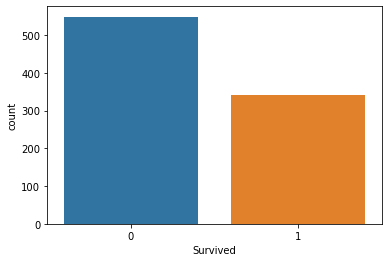

In [14]:
sns.countplot(df_train['Survived'])

using box plot also we can see that the target column is imbalnce

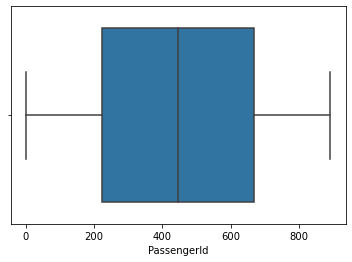

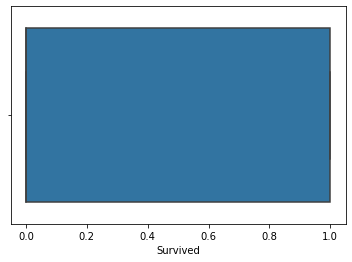

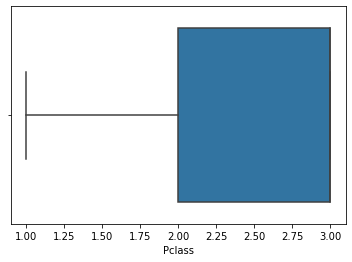

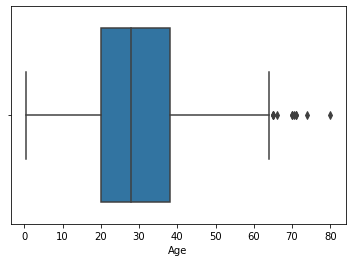

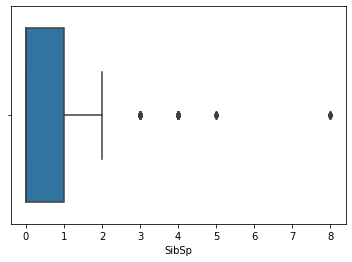

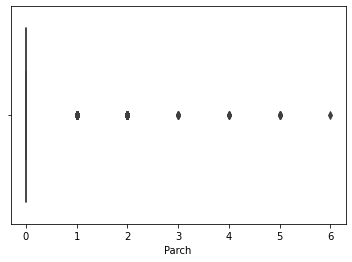

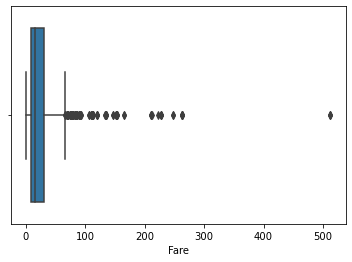

In [13]:
for i in df_train.describe().columns:
    sns.boxplot(df_train[i])
    plt.show()

Using boxplot we can find Outlier .So as we can observe we have outliers in many columns

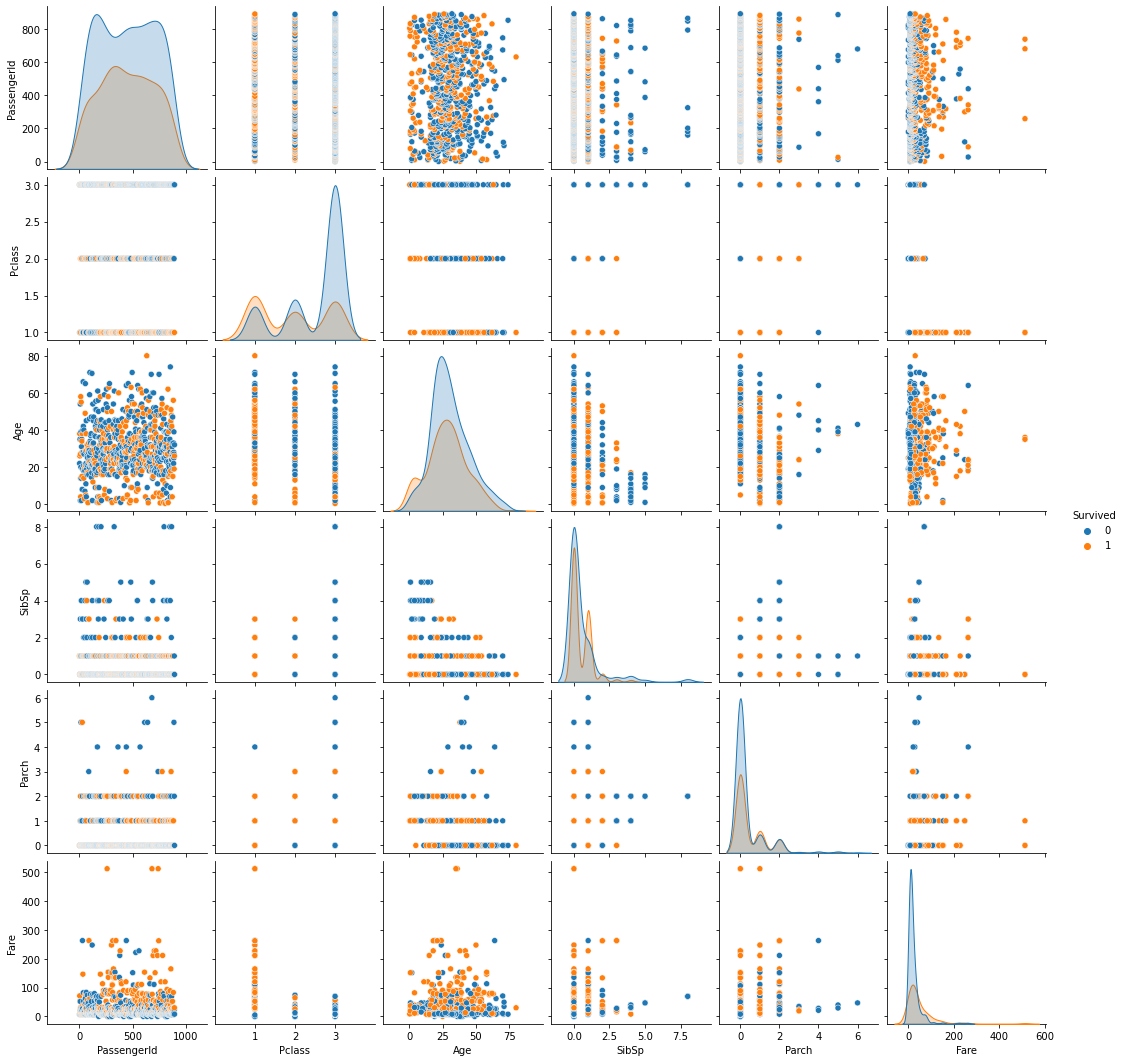

In [15]:
sns.pairplot(df_train,hue="Survived")

Pairplot shows the outliers and skewness of target and feature column.We observed that many values are scattered.The most scattered value is "PassengerId"

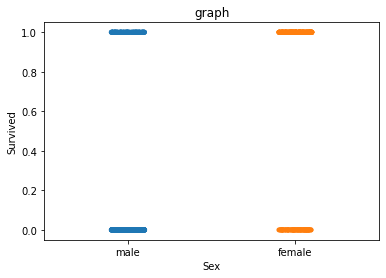

In [20]:
ax=sns.stripplot(x="Sex",y="Survived",data=df_train)
plt.title("graph")
plt.show()

Here we can see,The values are present in the top and low and it is breaking in between

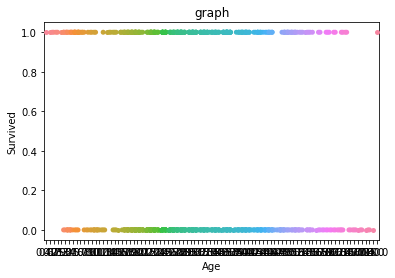

In [18]:
ax=sns.swarmplot(x="Age",y="Survived",data=df_train)
plt.title("graph")
plt.show()

Here we can see values are scattered in top and bottom and values are breaking in between

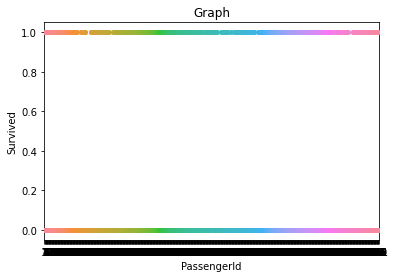

In [21]:
ax=sns.swarmplot(x="PassengerId",y="Survived",data=df_train)
plt.title("Graph")
plt.show()

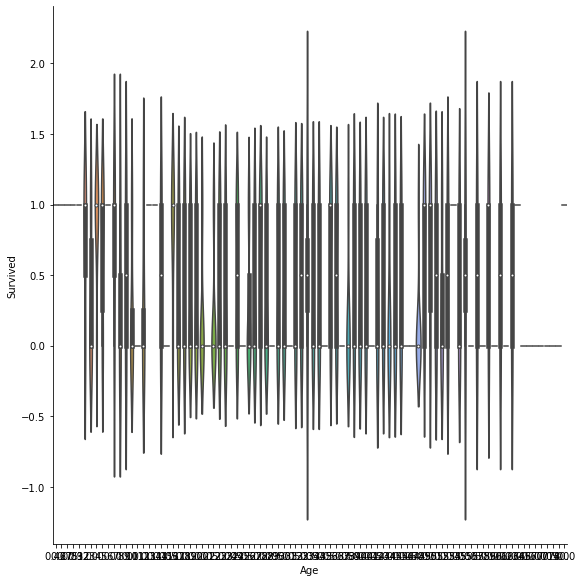

In [27]:
#Set up a category plot
g=sns.catplot("Age", y = "Survived",data=df_train,kind="violin",height = 8)
#show plot
plt.show()

Here we can the updown of the graph that how many Survived or not i.n the datasets.

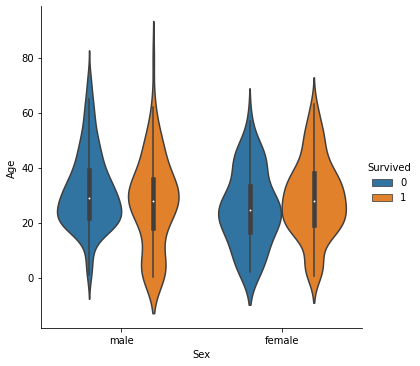

In [28]:
#Set up a category plot
g=sns.catplot(x="Sex", y = "Age",hue="Survived",data=df_train,kind="violin")
#show plot
plt.show()

Using catplot we observed that Male people are more survived compare to female.

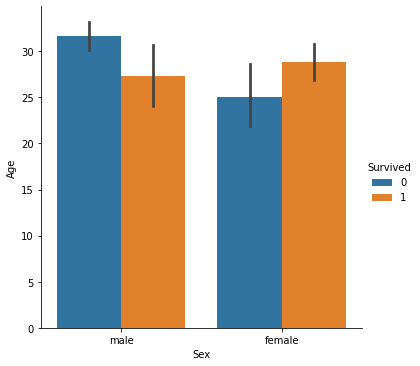

In [29]:
#Set up a category plot
g=sns.catplot(x="Sex", y = "Age",hue="Survived",data=df_train,kind="bar")
#show plot
plt.show()

Here we can see Female is having more chances of surving compare to Male.
ALso female under age of 25 have not survived.
In Man;- 30 and above has not survived

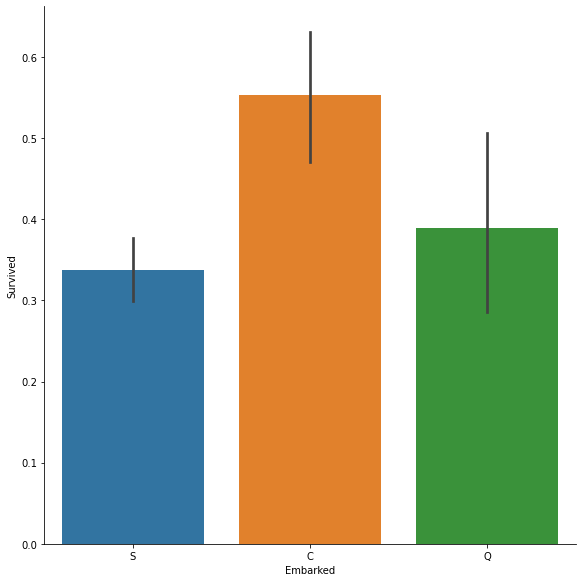

In [30]:
sns.catplot(x = "Embarked", y = "Survived", data = df_train, kind="bar", height = 8)

People who took the ship from C = Cherbourg have more chances of survival followed by Q = Queenstown and then S = Southampton.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

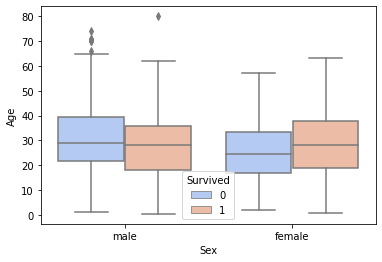

In [31]:
sns.boxplot(x="Sex", y = "Age",hue="Survived",data=df_train,palette="coolwarm")

Here we can see outliers are present in the Male

<AxesSubplot:xlabel='Age', ylabel='Density'>

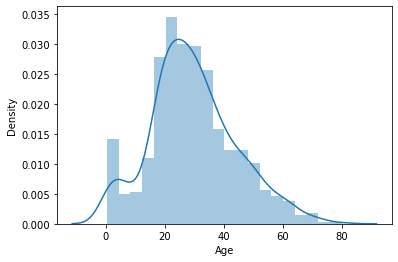

In [35]:
sns.distplot(df_train["Age"])

It is not properlly distributted that means skweness exist

<AxesSubplot:xlabel='Survived', ylabel='Density'>

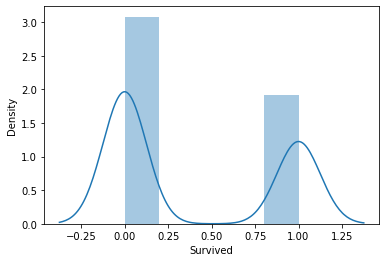

In [34]:
sns.distplot(df_train["Survived"])

It is not normally distributted that means skweness exist

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Values=['Sex',"Embarked"]
for i in Values:
    df_train[i]=le.fit_transform(df_train[i])
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2


Here we have converted 'Sex',"Embarked" in 0 and 1 because we need them for model building and it was in categorical types which was needed to be converted

In [41]:
delete = ['PassengerId','Name','Ticket','Cabin']
df_train.drop(delete,axis=1,inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


There are some columns which have nothing to do with survival probability like PassengerId, Ticket number, Cabin number and Name of the passenger.It is not contributing anything in our building of data model. So we can safely drop them before building our ml model.

# Missing values 

In [48]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Here we can see Age is having 177 null values so we need to nutrilize it

In [50]:
df_train["Age"]=df_train["Age"].replace(np.NaN,df_train['Age'].mean())
df_train['Age'].isnull().sum()

0

We have replaced all the NaN values with the "mean" . And now there are no null values present.

In [51]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

so now we can see we dont have any null value present

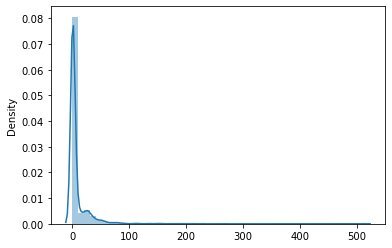

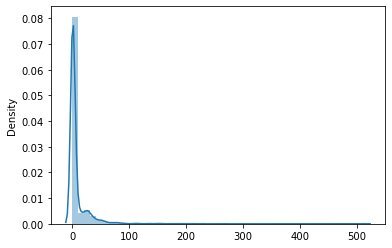

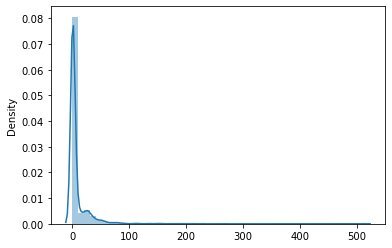

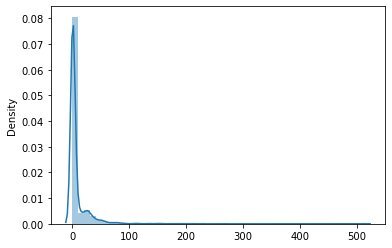

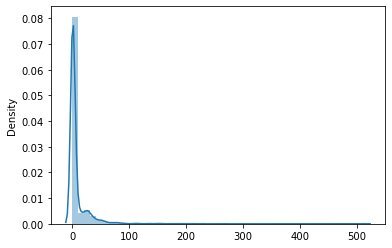

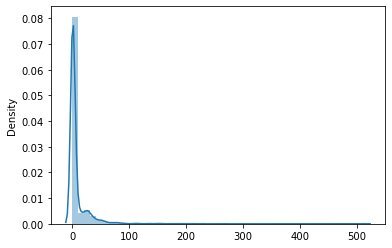

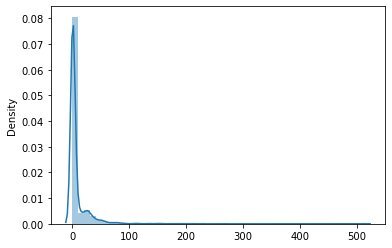

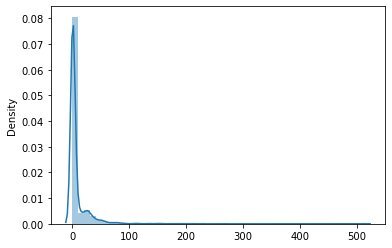

In [42]:
for i in df_train.describe().columns:
    plt.figure()
    sns.distplot(df_train)

We can obtained distribution using displot.Skewness is Observed in all columns

In [44]:
cor=df_train.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000


It gives the correlation of each variable with every other variable.

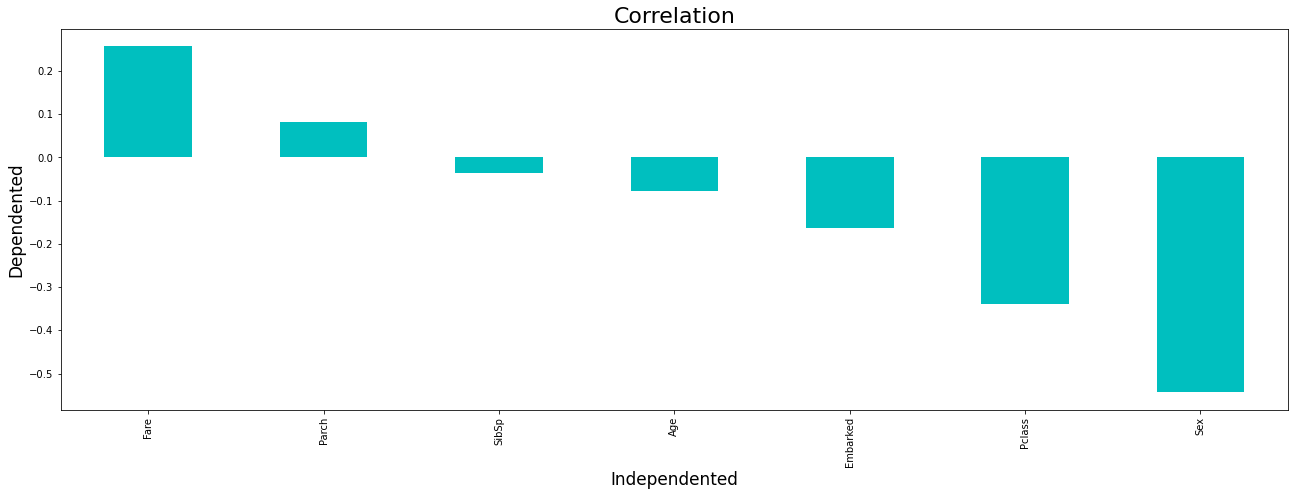

In [45]:
plt.figure(figsize=(22,7))
cor['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.ylabel('Dependented',fontsize=17)
plt.xlabel('Independented',fontsize=17)
plt.title('Correlation',fontsize=22)
plt.show()

Only Fare is positive Correlation and then from pench it is getting negative correlation.

<AxesSubplot:>

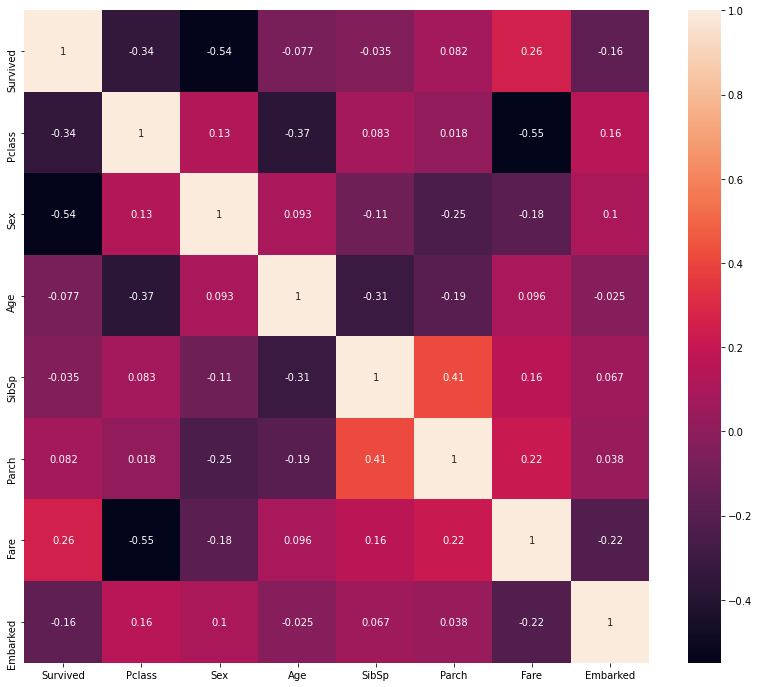

In [46]:
plt.figure(figsize=(14,12))
sns.heatmap(cor,annot=True)

heatmap show us which is more correlated which each other.Here we can observe that SibSp-Parch=41% correlated with eachother

Since it is a classification proble we dont need to find outliers and skewness but still we can do that

In [52]:
from scipy.stats import zscore

In [53]:
z=np.abs(zscore(df_train))

In [54]:
x=df_train.drop(['Survived'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [55]:
y=df_train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [57]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

here we can see 0=549 and 1=342 which is imbalnced.So need to balance them

<AxesSubplot:xlabel='Survived', ylabel='count'>

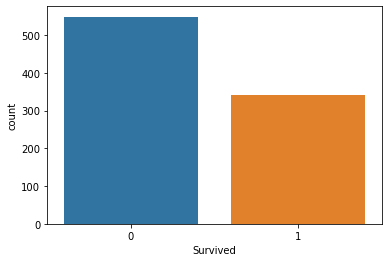

In [56]:
sns.countplot(y)

using countplot also we can check imbalnce datasets

# SMOTE(Imbalance treatment)

In [58]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
dfx,dfy = smote.fit_resample(x,y)
dfy

0       0
1       1
2       1
3       1
4       0
       ..
1093    1
1094    1
1095    1
1096    1
1097    1
Name: Survived, Length: 1098, dtype: int64

In [59]:
dfy.value_counts()

0    549
1    549
Name: Survived, dtype: int64

So we can see our data is balanced

<AxesSubplot:xlabel='Survived', ylabel='count'>

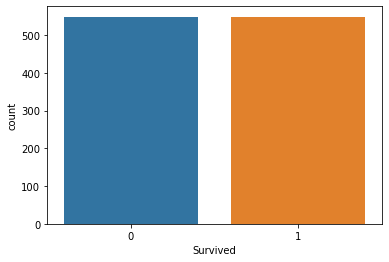

In [61]:
sns.countplot(dfy)

using countplot also we can check the imbalance in the datasets

# Model Building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV

In [64]:
dfx_train,dfx_test,dfy_train,dfy_test=train_test_split(dfx,dfy,test_size=.20,random_state=52)

In [73]:
#Support Vector Machine Classifier
svc = SVC()
dfxtrain,dfxtest,dfytrain,dfytest=train_test_split(dfx,dfy,test_size=.20,random_state=14)
svc.fit(dfxtrain,dfytrain)
svc.score(dfxtrain,dfytrain)
predsv=svc.predict(dfxtest)
print(accuracy_score(dfytest,predsv))
print(confusion_matrix(dfytest,predsv))
print(classification_report(dfytest,predsv))
print("Accuracy of Support Vector Machine Classifier = ",accuracy_score(dfytest,predsv)*100)
#cross validation
print("CVS for Support Vector Machine Classifier =",cvs(svc,dfx,dfy,cv=5).mean()*100)

0.7136363636363636
[[98 16]
 [47 59]]
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       114
           1       0.79      0.56      0.65       106

    accuracy                           0.71       220
   macro avg       0.73      0.71      0.70       220
weighted avg       0.73      0.71      0.71       220

Accuracy of Support Vector Machine Classifier =  71.36363636363636
CVS for Support Vector Machine Classifier = 65.84848484848484


In [74]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(dfx_train,dfy_train)
dtc.score(dfx_train,dfy_train)
preddt=dtc.predict(dfx_test)
print(accuracy_score(dfy_test,preddt))
print(confusion_matrix(dfy_test,preddt))
print(classification_report(dfy_test,preddt))
print("Accuracy of Decision Tree Classifier = ",accuracy_score(dfy_test,preddt)*100)
#cross validation
print("CVS for Support Vector Machine Classifier =",cvs(dtc,dfx,dfy,cv=5).mean()*100)

0.7909090909090909
[[92 23]
 [23 82]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       115
           1       0.78      0.78      0.78       105

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220

Accuracy of Decision Tree Classifier =  79.0909090909091
CVS for Support Vector Machine Classifier = 81.06890826068908


In [76]:
#KNeighbors Clasifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(dfx_train,dfy_train)
kn.score(dfx_train,dfy_train)
predkn=kn.predict(dfx_test)
print(accuracy_score(dfy_test,predkn))
print(confusion_matrix(dfy_test,predkn))
print(classification_report(dfy_test,predkn))
print("Accuracy of K-Neighbor Classifier =",accuracy_score(dfy_test,predkn)*100)
#cross validation
print("CVS for KNeighbors Classifier =",cvs(kn,dfx,dfy,cv=5).mean()*100)

0.7772727272727272
[[81 34]
 [15 90]]
              precision    recall  f1-score   support

           0       0.84      0.70      0.77       115
           1       0.73      0.86      0.79       105

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.79      0.78      0.78       220

Accuracy of K-Neighbor Classifier = 77.72727272727272
CVS for KNeighbors Classifier = 74.68949771689498


In [77]:
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(dfx_train,dfy_train)
rfc.score(dfx_train,dfy_train)
predrf=rfc.predict(dfx_test)
print(accuracy_score(dfy_test,predrf))
print(confusion_matrix(dfy_test,predrf))
print(classification_report(dfy_test,predrf))
print("Accuracy of Random Forest Classifier =",accuracy_score(dfy_test,predrf)*100)
#cross validation
print("CVS for RandomForest Classifier =",cvs(rfc,dfx,dfy,cv=5).mean()*100)

0.8318181818181818
[[100  15]
 [ 22  83]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       115
           1       0.85      0.79      0.82       105

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220

Accuracy of Random Forest Classifier = 83.18181818181817
CVS for RandomForest Classifier = 82.7970112079701


In [78]:
best_model=pd.DataFrame({'Model':['Support Vector Machine Classifier','#Decision Tree Classifier','KNeighbors Clasifier','Random Forest Classifier'],
                         'R_2 score':[71.36,79.09,77.72,83.18],
                         'Cross_validation':[65.84,81.06,74.68,82.79]})
best_model 

,Model,R_2 score,Cross_validation
0,Support Vector Machine Classifier,71.36,65.84
1,#Decision Tree Classifier,79.09,81.06
2,KNeighbors Clasifier,77.72,74.68
3,Random Forest Classifier,83.18,82.79


We will use Random Forest Classifier because it has the least difference with both accuracy and CV score.

# Hyper Parameter Tuning

In [79]:
parameter={'n_estimators':np.arange(50,350,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(dfx_train,dfy_train)
gvc.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 300}

In [80]:
model = RandomForestClassifier(criterion='gini',n_estimators=300,max_features='log2',class_weight='balanced_subsample')
model.fit(dfx_train,dfy_train)
pred=model.predict(dfx_test)
acc=accuracy_score(dfy_test,pred)
print(acc*100)

83.63636363636363


So,finally with th help of hyper tunning test,we can say that our Model is 83% accourate 

# AUC-ROC CURVE

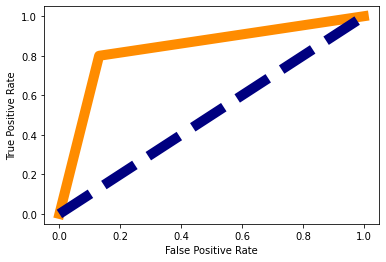

In [81]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(dfy_test,pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE")
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Hence,we have solved missing values and class imbalnce.So, hence we can go with our model.

# Saving the model

In [82]:
import joblib
joblib.dump(rfc,'final_titanic.pkl')

['final_titanic.pkl']

# Here at the end we are saving our best model which we found